# DATA620, Final Project
# Social Network Analysis of the NBA

Michael O'Donnell, CUNY School of Professional Studies

July, 2019

In [1]:
# import libraries
import csv
import math
import networkx as net
from networkx.algorithms import bipartite as bi
import matplotlib as plt
import pandas as pd
from matplotlib.pyplot import figure

# Goal of project: identify important NBA players' networks
Which players have had the most teammates? Which players have strong ties to LeBron James? Which NBA All-Stars have played together?

Today, NBA players change teams often. Players change teams for a variety of reasons, but the most discussed is to team up with other players. This project aims to depict the networks of NBA players' to visualize interesting networks, and speculate upon future player movement.

In [3]:
# open nba data as a CSV file
nba_data = csv.reader(open("NBA_network_all_v2.csv"))
nba_data_df = pd.read_csv("NBA_network_all_v2.csv", header = None)

# The Dataset:
the data includes player information from 1998-2019. But, this dataset only includes players that were active during the 2018-2019 NBA season. So, Vince Carter and Dwyane Wade are in this dataset because they played last season. But, Kobe Bryant and Shaq are not in the dataset because they did not play last season. 

In [4]:
# create network 
g = net.Graph()

# lists of all distinct teams and players
teams = []
players = []

# construct directed graph
for row in nba_data:
    if row[0] not in teams:
        teams.append(row[0])
    if row[1] not in players:
        players.append(row[1])
    g.add_edge(row[0], row[1], weight=1)

In [5]:
print "nodes in network:", len(g)

nodes in network: 4064


In [7]:
connected_net = list(net.connected_component_subgraphs(g))
print "size of largest component:", len(connected_net[0])

size of largest component: 4064


In [8]:
# players with the most seasons
print "Players with highest counts (not most seasons):"
print nba_data_df[1].value_counts().head(10)

Players with highest counts (not most seasons):
Eddie Johnson    29
Mike Dunleavy    26
Tim Hardaway     22
James Edwards    22
Kevin Willis     22
Vince Carter     22
Nazr Mohammed    22
Andre Miller     21
Robert Parish    21
Kevin Garnett    21
Name: 1, dtype: int64


In [9]:
# create an affiliation network of only teams
teamnet = bi.weighted_projected_graph(g, teams)

In [10]:
# create an affiliation network of only players
# this will become our main network..
playernet = bi.weighted_projected_graph(g, players, ratio = False)

In [20]:
# list of the players with most seasons as teammates:
connect_list = list(playernet.edges(data=True))
player_connections = sorted(connect_list, key=lambda tup: tup[2])
player_connections = player_connections[::-1]
print "Players with most seasons as teammates:"
player_connections[0:20]

Players with most seasons as teammates:


[('Tony Parker', 'Tim Duncan', {'weight': 15}),
 ('Tim Duncan', 'Manu Gin\xf3bili', {'weight': 14}),
 ('Tony Parker', 'Manu Gin\xf3bili', {'weight': 14}),
 ('Dwyane Wade', 'Udonis Haslem', {'weight': 14}),
 ('John Stockton', 'Karl Malone', {'weight': 13}),
 ('Derek Fisher', 'Kobe Bryant', {'weight': 13}),
 ('Robert Parish', 'Kevin McHale', {'weight': 13}),
 ('Isiah Thomas', 'Bill Laimbeer', {'weight': 13}),
 ('Clyde Drexler', 'Jerome Kersey', {'weight': 11}),
 ('Larry Bird', 'Kevin McHale', {'weight': 11}),
 ('Alvan Adams', 'Walter Davis', {'weight': 11}),
 ('Mike Conley', 'Marc Gasol', {'weight': 11}),
 ('Michael Cooper', 'Magic Johnson', {'weight': 11}),
 ('Brad Davis', 'Rolando Blackman', {'weight': 11}),
 ('Robert Parish', 'Larry Bird', {'weight': 11}),
 ('Terry Porter', 'Jerome Kersey', {'weight': 11}),
 ('Scottie Pippen', 'Michael Jordan', {'weight': 10}),
 ('J.J. Barea', 'Dirk Nowitzki', {'weight': 10}),
 ('Bill Laimbeer', 'Vinnie Johnson', {'weight': 10}),
 ('Rolando Blackman',

## Measures of Player Centrality

In networks, centrality is critically important. Centality finds the nodes (players) most central to the network by overall connections (Degree Centrality), closeness to rest of network (Closeness Centrality), or bridges between groups of players (Betweenness Centrality).

In [12]:
# look at centrality among players
deg = net.degree(playernet)
deg_list = sorted(playernet.degree, key=lambda x: x[1], reverse=True)

In [13]:
# look at closeness centrality of players, and teams
import operator
closeness_cen = net.closeness_centrality(playernet)
closeness_list = sorted(closeness_cen.items(), key=operator.itemgetter(1))

In [14]:
# look at betweenness centrality of players
betweenness_cen = net.betweenness_centrality(playernet)
betweenness_list = sorted(betweenness_cen.items(), key=operator.itemgetter(1))

## Highest degree centrality:

In [21]:
cen_list = []

for i in playernet:
    cen_list.append([i, deg[i], betweenness_cen[i], closeness_cen[i]])
    
centrality_df = pd.DataFrame(cen_list, columns = ['Player', 'Degree', 'Betweenness', 'Closeness'])

centrality_df = centrality_df.sort_values(by=['Degree'], ascending=False)
centrality_df.head(10)

,Player,Degree,Betweenness,Closeness
1756,Tim Hardaway,232,0.022279,0.478498
473,Mike Dunleavy,222,0.053110,0.485566
92,Joe Smith,212,0.005267,0.457464
2871,Eddie Johnson,209,0.009520,0.433863
1766,Jim Jackson,209,0.004765,0.444530
282,Vince Carter,207,0.007861,0.447764
2653,Juwan Howard,207,0.004960,0.450413
595,Andre Miller,191,0.004880,0.443848
2625,Rod Strickland,190,0.004938,0.451678
1663,Tyrone Corbin,188,0.006653,0.446382


## Highest betweenness centrality:

In [17]:
centrality_df = centrality_df.sort_values(by=['Betweenness'], ascending=False)
centrality_df.head(5)

,Player,Degree,Betweenness,Closeness
473,Mike Dunleavy,222,0.053110,0.485566
1357,Gerald Henderson,180,0.037756,0.479212
1756,Tim Hardaway,232,0.022279,0.478498
221,Larry Nance,129,0.018301,0.455878
86,Reggie Williams,177,0.014831,0.470560


## Highest closeness centrality:

In [18]:
centrality_df = centrality_df.sort_values(by=['Closeness'], ascending=False)
centrality_df.head(5)

,Player,Degree,Betweenness,Closeness
473,Mike Dunleavy,222,0.053110,0.485566
1357,Gerald Henderson,180,0.037756,0.479212
1756,Tim Hardaway,232,0.022279,0.478498
86,Reggie Williams,177,0.014831,0.470560
2528,Theo Ratliff,186,0.004508,0.459790


# Networks to NBA Superstars:
The networks of the top LeBron James, Stephen Curry, and are shown below. Note: the thicker the edge between the players, the more seasons those players were teammates.

In [19]:
one_season = [(u, v) for (u, v, d) in playernet.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in playernet.edges(data=True) if (d['weight']>1 and d['weight']<4)]
four_plus_seasons = [(u, v) for (u, v, d) in playernet.edges(data=True) if d['weight']>3]

In [307]:
free_agents = ["Jaylen Adams",
"Troy Caupain",
"Tyler Cavanaugh",
"Joe Chealey",
"Marquese Chriss",
"Ian Clark",
"Jamal Crawford",
"Mitchell Creek",
"Dante Cunningham",
"Sam Dekker",
"Angel Delgado",
"Luol Deng",
"Marcus Derrickson",
"Cheick Diallo",
"Tyler Dorsey",
"PJ Dozier",
"Trevon Duval",
"Vincent Edwards",
"Henry Ellenson",
"Jawun Evans",
"Kenneth Faried",
"Raymond Felton",
"Jimmer Fredette",
"Billy Garrett",
"Pau Gasol",
"Jonathan Gibson",
"Brandon Goodwin",
"Carmelo Anthony",
"Dwyane Wade"]

# LeBron James' network below:

In [308]:
LeBron_network = net.ego_graph(playernet, "LeBron James")
print "nodes in LeBron James' network (total teammates):", len(LeBron_network)
LeBron_cluster = net.Graph(net.ego_graph(playernet, "LeBron James", radius = 1))
print "percent of LeBron's teammates that have played together:", net.average_clustering(LeBron_cluster)

nodes in LeBron James' network (total teammates): 132
percent of LeBron's teammates that have played together: 0.635425232814


UnicodeDecodeError: 'ascii' codec can't decode byte 0xed in position 3: ordinal not in range(128)

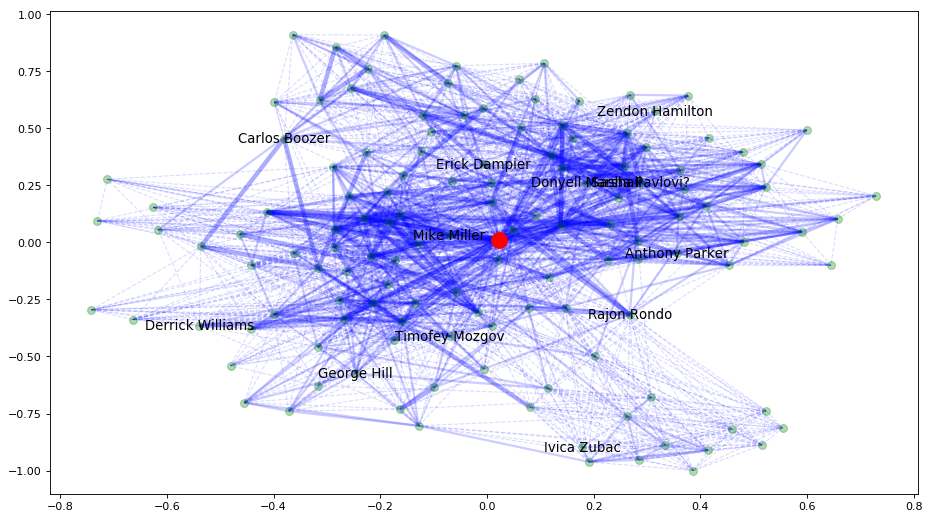

In [309]:
one_season = [(u, v) for (u, v, d) in LeBron_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in LeBron_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in LeBron_network.edges(data=True) if d['weight']>3]

figure(num=None, figsize=(14, 8), dpi=80)
pos = net.spring_layout(LeBron_network)  # positions for all nodes

# nodes
net.draw_networkx_nodes(LeBron_network, pos, node_size=50, node_color='g', alpha=0.3)
net.draw_networkx_nodes(LeBron_network, pos, nodelist=["LeBron James"], node_size=200, node_color='r')
#net.draw_networkx_nodes(LeBron_network, pos, nodelist=[free_agents], node_size=90, node_color='y')

# edges
net.draw_networkx_edges(LeBron_network, pos, edgelist=four_plus_seasons,
                       width=4, edge_color='b', alpha=0.32)
net.draw_networkx_edges(LeBron_network, pos, edgelist=two_three_seasons,
                       width=2, edge_color='b', alpha=0.2)
net.draw_networkx_edges(LeBron_network, pos, edgelist=one_season,
                       width=1, alpha=0.14, edge_color='b', style='dashed')

# labels
net.draw_networkx_labels(LeBron_network, pos, font_size=12, font_weight = 'normal', font_family='sans-serif')

In [334]:
# list of the players with most seasons as teammates:
connect_list = list(LeBron_network.edges(data=True))
player_connections = sorted(connect_list, key=lambda tup: tup[2])
player_connections = player_connections[::-1]
print "Players with most seasons as teammates:"
player_connections[0:15]

Players with most seasons as teammates:


[('Dwyane Wade', 'Udonis Haslem', {'weight': 14}),
 ('LeBron James', 'Zydrunas Ilgauskas', {'weight': 8}),
 ('Anderson Varej\xe3o', 'LeBron James', {'weight': 8}),
 ('Anderson Varej\xe3o', 'Daniel Gibson', {'weight': 7}),
 ('Rashard Lewis', 'Ray Allen*', {'weight': 7}),
 ('Mario Chalmers', 'Udonis Haslem', {'weight': 7}),
 ('Mario Chalmers', 'Dwyane Wade', {'weight': 7}),
 ('James Jones', 'LeBron James', {'weight': 7}),
 ('Iman Shumpert', 'J.R. Smith', {'weight': 7}),
 ('Joel Anthony', 'Udonis Haslem', {'weight': 7}),
 ('Joel Anthony', 'Dwyane Wade', {'weight': 7}),
 ('Anderson Varej\xe3o', 'Zydrunas Ilgauskas', {'weight': 6}),
 ('Chris Bosh', 'Udonis Haslem', {'weight': 6}),
 ('Dwyane Wade', 'Chris Bosh', {'weight': 6}),
 ('Kyrie Irving', 'Tristan Thompson', {'weight': 6})]

### In LeBron's network above is every active player he has teamed with. Thicker lines represent teammates he has spend more seasons with.

In [310]:
# free agents in LeBron's network:
print "Free Agents in LeBron's network (above):"
for i in free_agents:
    if i in LeBron_network:
        print i

Free Agents in LeBron's network (above):
Dwyane Wade


# Stephen Curry's network below:

In [311]:
Steph_network = net.ego_graph(playernet, "Stephen Curry")
print "nodes in Stephen Curry's networkd (total teammates):", len(Steph_network)
Steph_cluster = net.Graph(net.ego_graph(playernet, "Stephen Curry", radius = 1))
print "percent of Steph's teammates that have played together:", net.average_clustering(Steph_cluster)

nodes in Stephen Curry's networkd (total teammates): 76
percent of Steph's teammates that have played together: 0.714529044235


In [335]:
# list of the players with most seasons as teammates:
connect_list = list(Steph_network.edges(data=True))
player_connections = sorted(connect_list, key=lambda tup: tup[2])
player_connections = player_connections[::-1]
print "Players with most seasons as teammates:"
player_connections[0:15]

Players with most seasons as teammates:


[('Klay Thompson', 'Stephen Curry', {'weight': 8}),
 ('Andris Biedri?\x9a', 'Monta Ellis', {'weight': 7}),
 ('Stephen Curry', 'Draymond Green', {'weight': 7}),
 ('Klay Thompson', 'Draymond Green', {'weight': 7}),
 ('Nate Robinson', 'David Lee', {'weight': 6}),
 ('Andre Iguodala', 'Marreese Speights', {'weight': 6}),
 ('Dan Gadzuric', 'Charlie Bell', {'weight': 6}),
 ('DeMarcus Cousins', 'Jason Thompson', {'weight': 5}),
 ('Draymond Green', 'Andrew Bogut', {'weight': 5}),
 ('Stephen Curry', 'David Lee', {'weight': 5}),
 ('Stephen Curry', 'Andrew Bogut', {'weight': 5}),
 ('Harrison Barnes', 'Andrew Bogut', {'weight': 5}),
 ('Andre Iguodala', 'Stephen Curry', {'weight': 5}),
 ('Andre Iguodala', 'Draymond Green', {'weight': 5}),
 ('Charlie Bell', 'Andrew Bogut', {'weight': 5})]

UnicodeDecodeError: 'ascii' codec can't decode byte 0x9a in position 14: ordinal not in range(128)

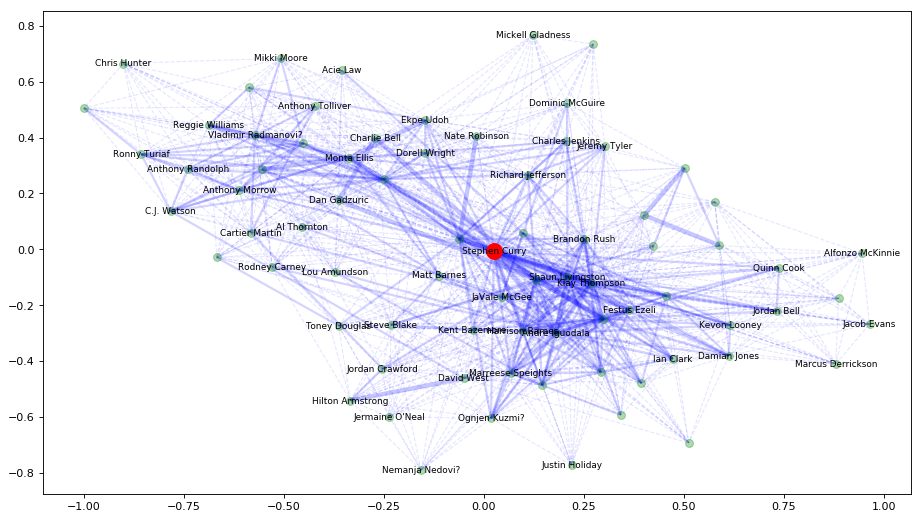

In [313]:
one_season = [(u, v) for (u, v, d) in Steph_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in Steph_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in Steph_network.edges(data=True) if d['weight']>3]

figure(num=None, figsize=(14, 8), dpi=80)
pos = net.spring_layout(Steph_network)  # positions for all nodes

# nodes
net.draw_networkx_nodes(Steph_network, pos, node_size=50, node_color='g', alpha=0.3)
net.draw_networkx_nodes(Steph_network, pos, nodelist=["Stephen Curry"], node_size=200, node_color='r')

# edges
net.draw_networkx_edges(Steph_network, pos, edgelist=four_plus_seasons,
                       width=4, edge_color='b', alpha=0.22)
net.draw_networkx_edges(Steph_network, pos, edgelist=two_three_seasons,
                       width=2, edge_color='b', alpha=0.17)
net.draw_networkx_edges(Steph_network, pos, edgelist=one_season,
                       width=1, alpha=0.1, edge_color='b', style='dashed')

# labels
net.draw_networkx_labels(Steph_network, pos, font_size=8, font_weight = 'normal', font_family='sans-serif')

### Stephen Cury has only played for 1 team, while LeBron has played for 3 teams. Hence, Stephen Curry's network has 1 tight group of players above, while LeBron's network has 2 or 3 tight groups of players. 

In [314]:
# free agents in LeBron's network:
print "Free Agents in Steph's network (above):"
for i in free_agents:
    if i in Steph_network:
        print i

Free Agents in Steph's network (above):
Ian Clark
Marcus Derrickson


# Kawhi Leonard's network below:

In [315]:
Kawhi_network = net.ego_graph(playernet, "Kawhi Leonard")
print "nodes in Kawhi Leonard's network (total teammates):", len(Kawhi_network)
Kawhi_cluster = net.Graph(net.ego_graph(playernet, "Kawhi Leonard", radius = 1))
print "percent of Kawhi's teammates that have played together:", net.average_clustering(Kawhi_cluster)

nodes in Kawhi Leonard's network (total teammates): 59
percent of Kawhi's teammates that have played together: 0.816608958305


UnicodeDecodeError: 'ascii' codec can't decode byte 0xf3 in position 8: ordinal not in range(128)

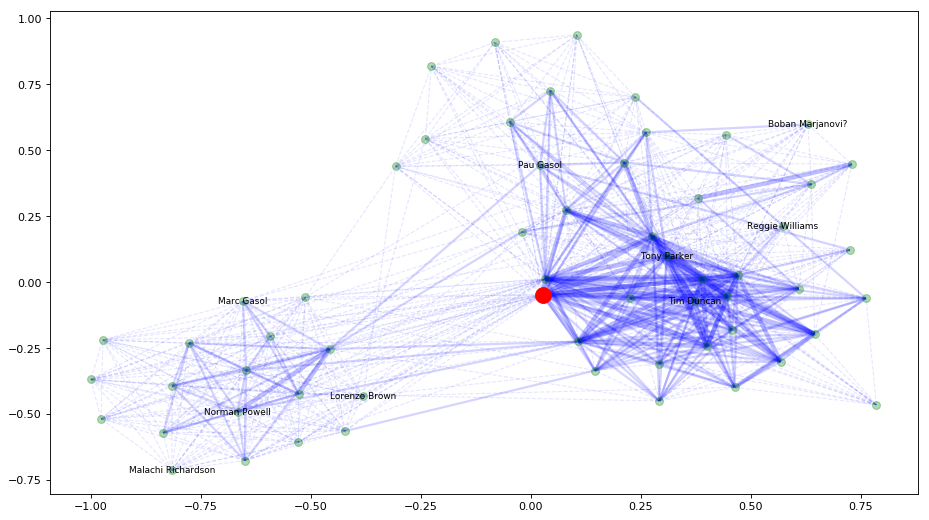

In [317]:
one_season = [(u, v) for (u, v, d) in Kawhi_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in Kawhi_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in Kawhi_network.edges(data=True) if d['weight']>3]

figure(num=None, figsize=(14, 8), dpi=80)
pos = net.spring_layout(Kawhi_network)  # positions for all nodes

# nodes
net.draw_networkx_nodes(Kawhi_network, pos, node_size=50, node_color='g', alpha=0.3)
net.draw_networkx_nodes(Kawhi_network, pos, nodelist=["Kawhi Leonard"], node_size=200, node_color='r')

# edges
net.draw_networkx_edges(Kawhi_network, pos, edgelist=four_plus_seasons,
                       width=4, edge_color='b', alpha=0.25)
net.draw_networkx_edges(Kawhi_network, pos, edgelist=two_three_seasons,
                       width=2, edge_color='b', alpha=0.17)
net.draw_networkx_edges(Kawhi_network, pos, edgelist=one_season,
                       width=1, alpha=0.1, edge_color='b', style='dashed')

# labels
net.draw_networkx_labels(Kawhi_network, pos, font_size=8, font_weight = 'normal', font_family='sans-serif')

### Danny Green was part of the trade that sent Kawhi from the Spurs to the Raptors. Thus, Danny Green's node is near Kawhi above, in the middle of two clusters.

In [318]:
# free agents in LeBron's network:
print "Free Agents in Kawhi's network (above):"
for i in free_agents:
    if i in Kawhi_network:
        print i

Free Agents in Kawhi's network (above):
Pau Gasol


# Network of NBA All-Stars:

In [319]:
All_Star_players = ['James Harden',
             'Kevin Durant',
             'Kyrie Irving',
             'Kawhi Leonard',
             'LeBron James',
             'Anthony Davis',
             'Ben Simmons',
             'Bradley Beal',
             'Damian Lillard',
             'Dwyane Wade',
             'Karl-Anthony Towns',
             'Klay Thompson',
             'LaMarcus Aldridge',
             'Giannis Antetokounmpo',
             'Stephen Curry',
             'Joel Embiid',
             'Paul George',
             'Kemba Walker',
             'Blake Griffin',
             "D'Angelo Russell",
             'Dirk Nowitzki',
             'Khris Middleton',
             'Kyle Lowry',
             'Nikola Jokic',
             'Nikola Vucevic',
             'Victor Oladipo',
             'Russell Westbrook']

In [320]:
for i in All_Star_players:
    print i, "total teammates in the league:", len([n for n in playernet.neighbors(i)])

James Harden total teammates in the league: 82
Kevin Durant total teammates in the league: 85
Kyrie Irving total teammates in the league: 72
Kawhi Leonard total teammates in the league: 58
LeBron James total teammates in the league: 131
Anthony Davis total teammates in the league: 58
Ben Simmons total teammates in the league: 20
Bradley Beal total teammates in the league: 56
Damian Lillard total teammates in the league: 50
Dwyane Wade total teammates in the league: 118
Karl-Anthony Towns total teammates in the league: 34
Klay Thompson total teammates in the league: 54
LaMarcus Aldridge total teammates in the league: 98
Giannis Antetokounmpo total teammates in the league: 48
Stephen Curry total teammates in the league: 75
Joel Embiid total teammates in the league: 32
Paul George total teammates in the league: 68
Kemba Walker total teammates in the league: 59
Blake Griffin total teammates in the league: 90
D'Angelo Russell total teammates in the league: 38
Dirk Nowitzki total teammates i

{'Anthony Davis': Text(-0.939693,-0.34202,u'Anthony Davis'),
 'Ben Simmons': Text(-0.5,0.866025,u'Ben Simmons'),
 'Blake Griffin': Text(0.173648,-0.984808,u'Blake Griffin'),
 'Bradley Beal': Text(0.766044,0.642788,u'Bradley Beal'),
 "D'Angelo Russell": Text(0.973045,0.230616,u"D'Angelo Russell"),
 'Damian Lillard': Text(-0.686242,-0.727374,u'Damian Lillard'),
 'Dirk Nowitzki': Text(0.766044,-0.642788,u'Dirk Nowitzki'),
 'Dwyane Wade': Text(1,9.65816e-09,u'Dwyane Wade'),
 'Giannis Antetokounmpo': Text(0.893633,-0.448799,u'Giannis Antetokounmpo'),
 'James Harden': Text(-0.0581448,0.998308,u'James Harden'),
 'Joel Embiid': Text(0.597159,0.802123,u'Joel Embiid'),
 'Karl-Anthony Towns': Text(-0.5,-0.866025,u'Karl-Anthony Towns'),
 'Kawhi Leonard': Text(0.973045,-0.230616,u'Kawhi Leonard'),
 'Kemba Walker': Text(-0.939693,0.34202,u'Kemba Walker'),
 'Kevin Durant': Text(-0.835488,0.549509,u'Kevin Durant'),
 'Khris Middleton': Text(-0.686242,0.727374,u'Khris Middleton'),
 'Klay Thompson': Text

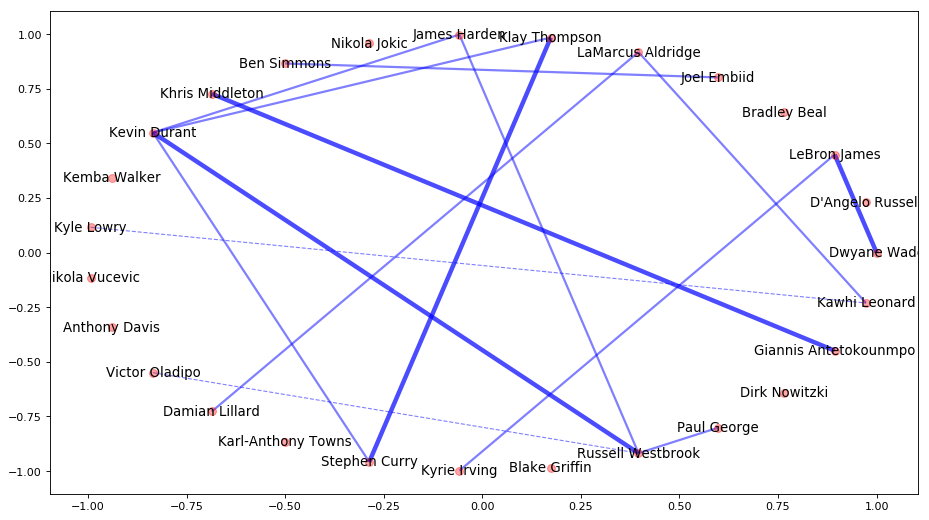

In [321]:
AllStar_network = playernet.subgraph(All_Star_players)

one_season = [(u, v) for (u, v, d) in AllStar_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in AllStar_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in AllStar_network.edges(data=True) if d['weight']>3]

figure(num=None, figsize=(14, 8), dpi=80)
pos = net.circular_layout(AllStar_network)  # positions for all nodes

# nodes
net.draw_networkx_nodes(AllStar_network, pos, node_size=50, node_color='r', alpha=0.35)
#net.draw_networkx_nodes(Kawhi_network, pos, nodelist=["Kawhi Leonard"], node_size=200, node_color='r')

# edges
net.draw_networkx_edges(AllStar_network, pos, edgelist=four_plus_seasons,
                       width=4, edge_color='b', alpha=0.7)
net.draw_networkx_edges(AllStar_network, pos, edgelist=two_three_seasons,
                       width=2, edge_color='b', alpha=0.5)
net.draw_networkx_edges(AllStar_network, pos, edgelist=one_season,
                       width=1, alpha=0.5, edge_color='b', style='dashed')

# labels
net.draw_networkx_labels(AllStar_network, pos, font_size=12, font_weight = 'normal', font_family='sans-serif')

### Kevin Durant and Russell Westbrook have played with four current All-Stars at some point in their careers. But, the list below shows 8 current All-Stars have never played with another current All-Star.

In [322]:
AS_list = []

for i in All_Star_players:
    AS_list.append([i, len([n for n in AllStar_network.neighbors(i)])])
    
AS_df = pd.DataFrame(AS_list, columns = ['Player', 'All-Star Teammates'])

AS_df = AS_df.sort_values(by=['All-Star Teammates'], ascending=False)
AS_df


#for i in All_Star_players:
#    print i, "total All-Star teammates:", len([n for n in AllStar_network.neighbors(i)])

,Player,All-Star Teammates
26,Russell Westbrook,4
1,Kevin Durant,4
11,Klay Thompson,2
14,Stephen Curry,2
12,LaMarcus Aldridge,2
0,James Harden,2
4,LeBron James,2
3,Kawhi Leonard,2
6,Ben Simmons,1
2,Kyrie Irving,1


# Players that have played for most teams:

In [328]:
nba_data_df.columns = ['TeamYear', 'Player', 'Year',
             'Team', 'Games', 'Status', 'Pos',
             'Age', 'Pts']
nba_data_df.head()

,TeamYear,Player,Year,Team,Games,Status,Pos,Age,Pts
0,OKC2018,�lex Abrines,2018,OKC,31,Active,SG,25,5.3
1,PHO2018,Quincy Acy,2018,PHO,10,Active,PF,28,1.7
2,ATL2018,Jaylen Adams,2018,ATL,34,Active,PG,22,3.2
3,OKC2018,Steven Adams,2018,OKC,80,Active,C,25,13.9
4,MIA2018,Bam Adebayo,2018,MIA,82,Active,C,21,8.9


In [329]:
nba_players = pd.DataFrame(nba_data_df.groupby("Player").Team.nunique())
nba_players = nba_players.sort_values(by=["Team"], ascending=False)
nba_players.head(20)

,Team
Player,
Mike James,12
Joe Smith,10
Damon Jones,10
Drew Gooden,9
Kevin Ollie,9
Andre Miller,9
Caron Butler,9
Lou Amundson,9
Ish Smith,9


# Teams that have had the most active players:

In [330]:
nba_teams = pd.DataFrame(nba_data_df.groupby("Team").Player.nunique())
nba_teams = nba_teams.sort_values(by=["Player"], ascending=False)
nba_teams.head(10)

,Player
Team,
LAC,175
CLE,172
NYK,168
PHI,163
TOR,161
PHO,161
HOU,159
ATL,158
DAL,158


### From above: Nearly 10% of the current players have played on the Suns during their career.